# Introduction

Ever since the world of streaming has started, Netflix has been the first and currently the biggest player in the market. Although the competitors such as Hulu, Amazon Prime, Hotstar and many more have also joined in the streaming race, Netflix still is ahead in terms and popularity and revenue generated.

Netflix was quite a visionary company from it's early days of competing against Blockbuster who was a big recorded movie tape company. Netflix took the huge risk of developing streaming content and applied various ML algorithms for user recommendations while Blockbuster tried to hold their ground in the recorded tape division without thinking of the change that would be expected in the upcoming decade. Blockbuster is now bankrupt while Netflix is currently the king of streaming websites.

Through this particular notebook, we shall look at various Netflix titles and analyse the popular ones amongst the viewers.

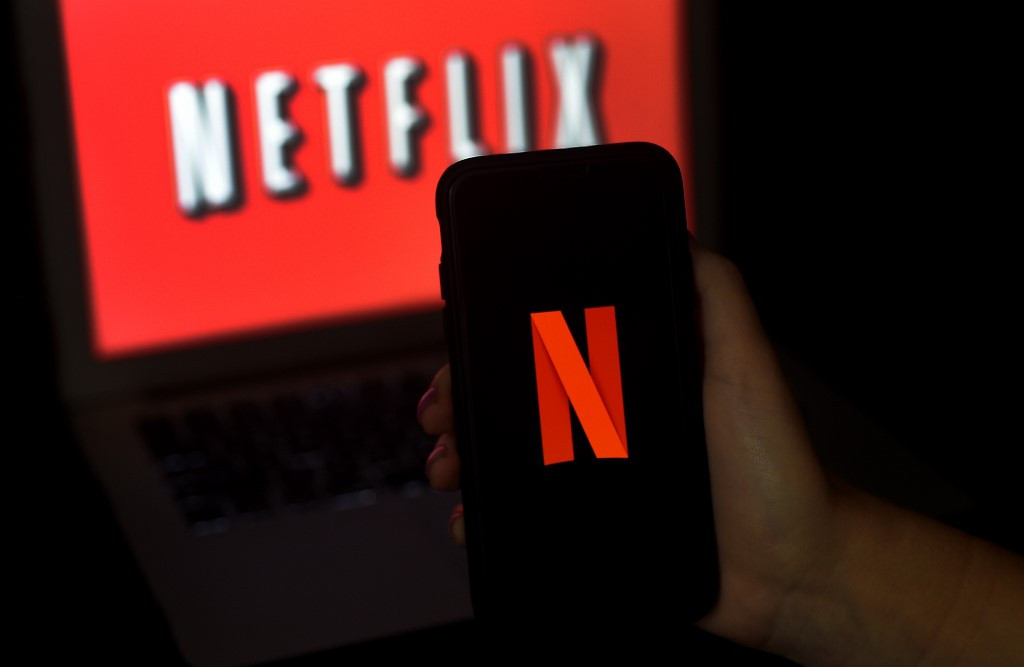


# Importing relevant libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode (connected = True)

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Data Visualisation



## a) Missing values


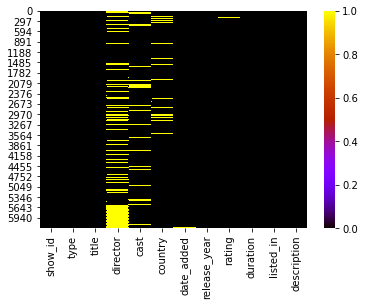

In [3]:
sns.heatmap(df.isna(),cmap='gnuplot')

As we can see, the columns of director, cast and country have the highest number of missing values associated with it.

## b) Type of title

Let us check the number of titles marked as movies or shows.

In [4]:
df['Count']=1
df_titles=df.groupby('type')['Count'].sum().reset_index()

In [5]:
fig1=px.pie(df_titles,values='Count',names='type',hole=0.4)
fig1.update_layout(title='Type of title',title_x=0.5)
fig1.update_traces(textfont_size=15,textinfo='percent+label')
fig1.show()

As we can see, almost 70 % of the netflix content is movies while 31.6 %  are TV shows. This is expected because number of episodes per TV show is usually very high and hence, there can be only limited number of shows available.


## c) Top 20 producing countries

Let us check which countries have produced the highest number of netflix content.

In [6]:
df_countries=df.groupby('country')['Count'].sum().reset_index().sort_values(by='Count',ascending=False).head(20)

In [7]:
fig2=px.bar(df_countries,x='country',y='Count',color='Count',height=800,width=1000,labels={'country':'Country','Count':'Content produced'})
fig2.update_layout(title='Top 20 producing countries',title_x=0.5)
fig2.show()

USA is currently leading by a huge margin followed by India and United Kingdom.


## d) Content type produced by each of the top 20 countries

Let us now check how are the content divided in terms of title types.

In [8]:
df_top20=df[df['country'].isin(['United States', 'India', 'United Kingdom', 'Japan', 'Canada',
       'South Korea', 'Spain', 'France', 'Mexico', 'Turkey', 'Australia',
       'Taiwan', 'Hong Kong', 'United Kingdom, United States', 'Thailand',
       'China', 'Egypt', 'Brazil', 'Philippines', 'Indonesia'])]

In [9]:
fig3=px.sunburst(df_top20,path=['country','type'],names='type')
fig3.update_layout(title="Title type distribution per nation",title_x=0.5,template='plotly_white')
fig3.show()

As we can see,the major contributions of United States and India have been through movies while for UK and Japan, it has been through TV shows.

## e) Popular months of release

Let us check which months have more releases attributed to it over the past few years. For this, we shall require some amount of data pre-processing as shown below:

In [10]:
df['date_added']=df['date_added'].str.strip()


In [11]:
df_months=pd.DataFrame(df['date_added'].str.split(' ').apply(pd.Series).dropna()[0])
df_months.rename(columns={0:'Month released'},inplace=True)
df_months['Count']=1
months_grouped=df_months.groupby('Month released')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)

In [12]:
fig4=px.funnel(months_grouped,x='Count',y='Month released',color='Count',labels={'Count':'Amount of content released'})
fig4.update_layout(title='Popular months of content release',title_x=0.5,template='plotly_dark')
fig4.show()

From the above visualisation, it can be seen that the winter months of December, November and January are extremely busy in terms of new releases. This could be because these are generally associated with holiday months and hence, people can be treated with new content which they'll be more likely to watch. October is also a very busy month for Netflix. This can be because some of the popular festivals in both Western and Asian nations are celebrated in this month which allows more people to be free from their work and consume Netflix content.

## f) Trend of content releases over the past few years

Let us check how the trend of releases has been for the past few years.

In [13]:
df_tv=df[df['type']=='TV Show']
df_mov=df[df['type']=='Movie']

df_tv_years=df_tv.groupby('release_year')['Count'].sum().reset_index()
df_mov_years=df_mov.groupby('release_year')['Count'].sum().reset_index()

In [14]:
df_years=df.groupby('release_year')['Count'].sum().reset_index()

fig5=px.line(df_years,x='release_year',y='Count',labels={'release_year':'Year of release','Count':'Amount of content released'})
fig5.update_traces(name='Total content',showlegend=True)
fig5.add_scatter(name='TV shows',x=df_tv_years['release_year'], y=df_tv_years['Count'], mode='lines')
fig5.add_scatter(name='Movies',x=df_mov_years['release_year'], y=df_mov_years['Count'], mode='lines')
fig5.update_layout(title='Number of releases each year',title_x=0.5,template='plotly_dark')


As we can see, the number of content releases rose exponentially post 2010. This is because more and more people started using smartphones after the success of the iPhones post 2007. Many more devices were released in the market that could connect to the internet and let people watch their favourite shows and movies. Hence, the demand for new content rose extremely. However, 2019 has seen a lower number of releases. Although 2020 is a running year, the number of releases are expected to dip sharply due to the ongoing pandemic that has halted or delayed shooting considerably.

The curve further tells us that the number of movie releases per year has always been higher than TV show releases.


## g) Content distribution based on ratings

The content on all streaming services are rated based on various parameters to check if the content is disturbing, require parental guidance, children friendly, etc. Let us see how the content is distributed. T



In [15]:
df_ratings=df.dropna().groupby('rating')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)


In [16]:
fig6=px.sunburst(df.dropna(),path=['rating','type'],names='type',color='rating',color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig6.update_layout(title="Content rating distribution",title_x=0,title_y=0.3,template='plotly_white',margin = dict(t=0, l=0, r=0, b=0))
fig6.show()

From the content rating distribution on TV shows and movies, we see that most of the movies fall under the TV-MA rating followed by TV-14. Almost an equal number of TV shows fall under both of these categories as seen from the sunburst visualisation.


## h) Duration of movies

Let us check how are the movie durations distributed. For this purpose, we would require some amount of pre-processing to be done first.

In [17]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4265 entries, 0 to 6231
Data columns (total 13 columns):
show_id         4265 non-null int64
type            4265 non-null object
title           4265 non-null object
director        4137 non-null object
cast            3905 non-null object
country         4070 non-null object
date_added      4264 non-null object
release_year    4265 non-null int64
rating          4257 non-null object
duration        4265 non-null object
listed_in       4265 non-null object
description     4265 non-null object
Count           4265 non-null int64
dtypes: int64(3), object(10)
memory usage: 466.5+ KB


As we can see, the duration column is an object. We need this column to be in integers for proper visualisation.

In [18]:
durations=df_mov['duration'].str.split(' ').apply(pd.Series)

In [19]:
durations=pd.DataFrame(durations[0].astype(int))
durations.rename(columns={0:'Duration'},inplace=True)

In [20]:
fig7=px.histogram(durations,x='Duration',marginal='box',
                  labels={'Duration':'Duration of movie in minutes'},opacity=0.8,color_discrete_sequence=['orange'])
fig7.update_layout(template='plotly_dark',title='Movie duration distribution',title_x=0.5)

From the above histogram, we can see that the movie duration distribution is normally distributed and has a median of **98 minutes (1 Hr 38 mins )**.

## i) Popular categories

Let us check which are the popular categories in which, the content is being listed in. We shall visualise this with the help of a wordcloud.

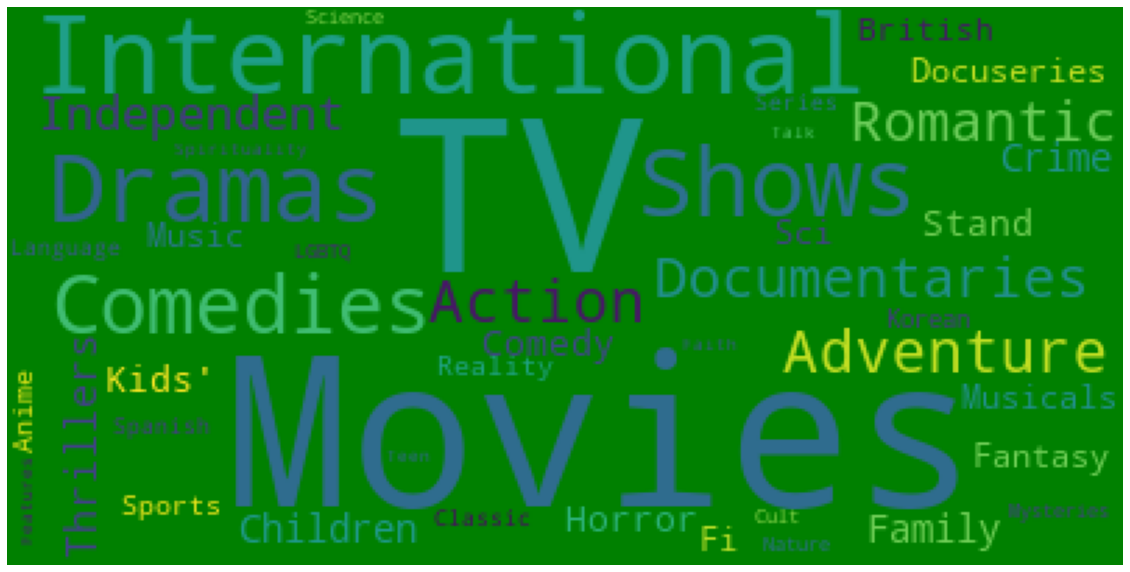

In [21]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(20,20))
categories=df['listed_in'].values
wc_cats=WordCloud(max_words=50,background_color='green',collocations=False).generate(str(' '.join(categories)))
plt.imshow(wc_cats)
plt.axis("off")
plt.show()

As it can be seen, TV shows  and Movies are the most popular Netflix categories. Dramas and Comedies are also very popular categories on Netflix.


## j) Choropleth map of all the popular content producing nations

In [59]:
df_countries_all=df.groupby('country')['Count'].sum().reset_index().sort_values(by='Count',ascending=False).head(126)
map_data = [go.Choropleth( 
           locations = df_countries_all['country'],
           locationmode = 'country names',
           z = df_countries_all["Count"], 
           text = df_countries_all['country'],
           colorbar = {'title':'Amount of content'},
           colorscale='solar')]

layout = dict(title = 'Content per nation', title_x=0.5,
             geo = dict(showframe = False, 
                       projection = dict(type = 'equirectangular')))

world_map = go.Figure(data=map_data, layout=layout)
iplot(world_map)